In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_style import *
plot_style()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


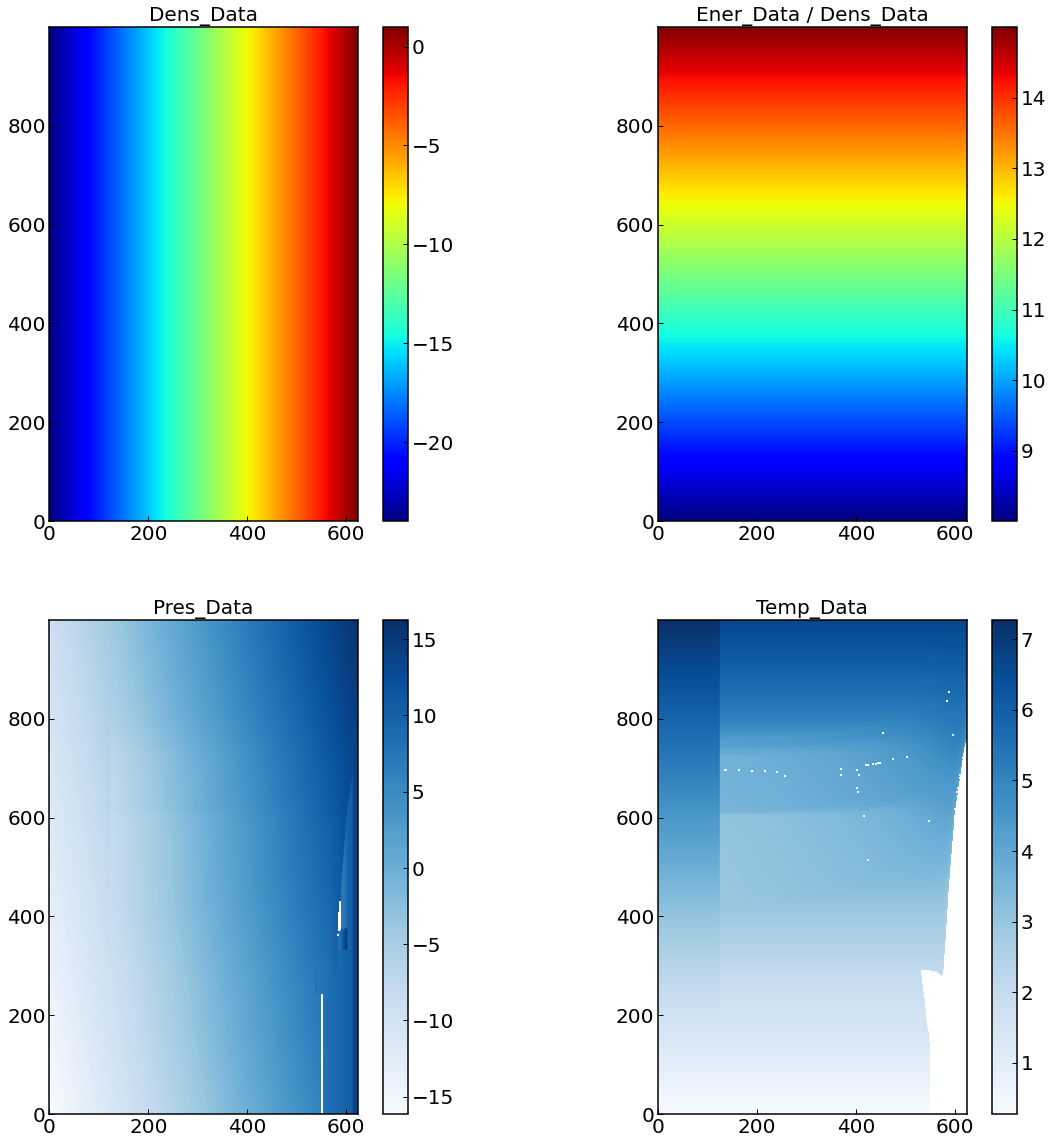

In [2]:
nEnergy = 1000
nRho = 625
RhoMin = 1e-24
RhoMax = 10
Emin = 1e8 
Emax = 1e15
Tmin = 3.0
Tmax = 1e5
gamma = 1.666667
Const_kb = 1.38064852e-16
Const_amu = 1.660539040e-24 
Dens_Data = np.fromfile("../resources/archive/Dens_Table.bin").reshape(1000,625)
Ener_Data = np.fromfile("../resources/archive/Ener_Table.bin").reshape(1000,625)
Pres_Data = np.fromfile("../resources/archive/Pres_Table.bin").reshape(1000,625)
Temp_Data = np.fromfile("../resources/archive/Temp_Table.bin").reshape(1000,625)

plt.figure( figsize=(20, 20))
plt.subplot(2, 2, 1 )
plt.title("Dens_Data")
plt.imshow( np.log10( Dens_Data ), origin = 'lower', cmap = plt.cm.jet )
plt.colorbar()

plt.subplot(2, 2, 2 )
plt.title("Ener_Data / Dens_Data")
plt.imshow( np.log10( Ener_Data / Dens_Data ), origin = 'lower', cmap = plt.cm.jet )
plt.colorbar()

plt.subplot(2, 2, 3 )
plt.title("Pres_Data")
plt.imshow( np.log10( Pres_Data ), origin = 'lower', cmap = plt.cm.Blues )
plt.colorbar()

plt.subplot(2, 2, 4 )
plt.title("Temp_Data")
plt.imshow( np.log10( Temp_Data ), origin = 'lower', cmap = plt.cm.Blues )
plt.colorbar()

In [3]:
print( 'Dens_Data[:,0]\n', Dens_Data[:,0] )
print( 'Ener_Data[:,0]\n', Ener_Data[:,0] )
print( 'Temp_Data[:,0]\n', Temp_Data[:,0] )
print( 'Pres_Data[:,0]\n', Pres_Data[:,0] )

Dens_Data[:,0]
 [1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712855e-24 1.04712855e-24 1.04712855e-24 1.04712855e-24
 1.04712

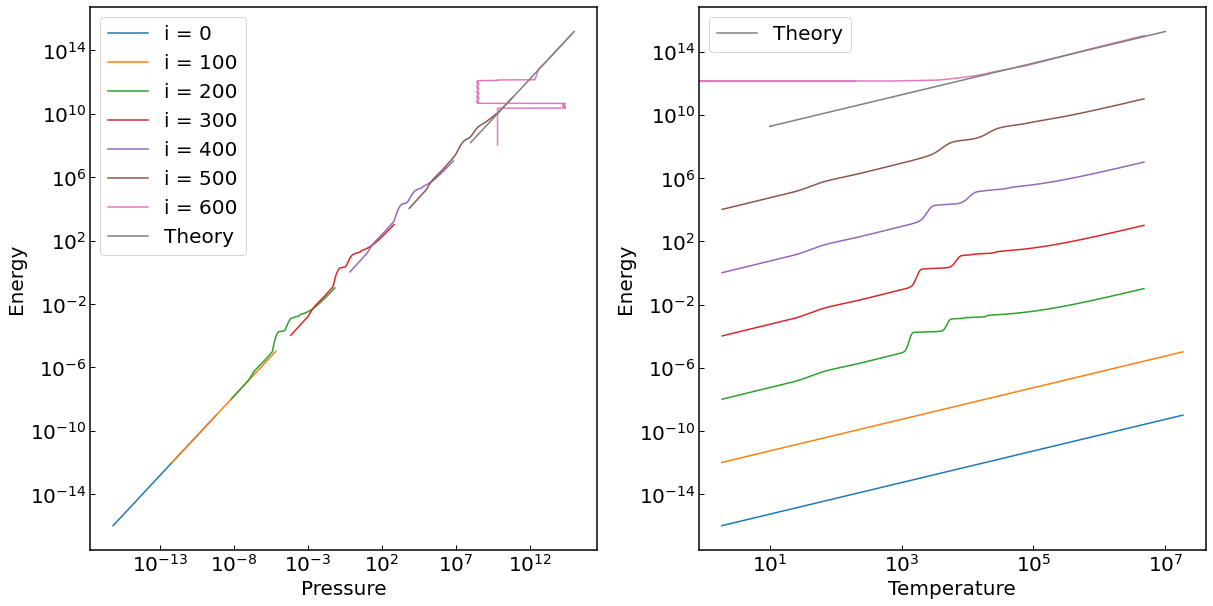

In [4]:
plt.figure( figsize = (20, 10) )
Pres = np.logspace(8, 15 , 1000)
Temp = np.logspace(1, 7, 1000)
Ener = Pres/ (1.67-1)

plt.subplot(1,2,1)
for i in range(0, 625, 100):
    plt.loglog( Pres_Data[:, i] , Ener_Data[:, i], label="i = " + str(i) )
plt.loglog( Pres, Ener, label='Theory' )    
plt.xlabel("Pressure")
plt.ylabel("Energy")
plt.legend()


plt.subplot(1,2,2)
Ener = Const_kb / ( 1.67 - 1 ) / 0.66 / Const_amu * Temp
for i in range(0, 625, 100):
    plt.loglog( Temp_Data[:, i], Ener_Data[:, i] )
plt.loglog( Temp, Ener, label='Theory' )
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.legend()

Length of Zero_Index: 35265


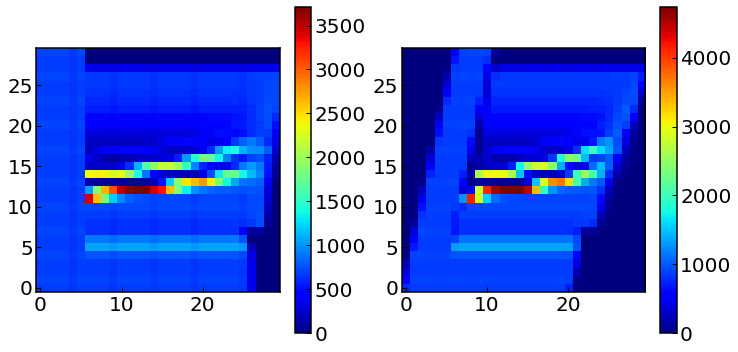

In [5]:
Dens_Data = Dens_Data.reshape( 625000 )
Ener_Data = Ener_Data.reshape( 625000 )
Pres_Data = Pres_Data.reshape( 625000 )
Temp_Data = Temp_Data.reshape( 625000 )

Zero_Index = np.where( Temp_Data == 0.0 )[0]
print("Length of Zero_Index:", len(Zero_Index) )
Dens_Data = np.delete( Dens_Data, Zero_Index )
Temp_Data = np.delete( Temp_Data, Zero_Index )
Ener_Data = np.delete( Ener_Data, Zero_Index )

Dens_Data = np.log10( Dens_Data )
Temp_Data = np.log10( Temp_Data )
Ener_Data = np.log10( Ener_Data )

plt.figure(figsize=(12, 6))
plt.subplot( 1, 2, 1 )
H, xedges, yedges = np.histogram2d(Dens_Data, Temp_Data, bins=30)
H = H.T
plt.imshow( H, origin = 'lower', cmap = plt.cm.jet )
plt.colorbar()

plt.subplot( 1, 2, 2 )
H, xedges, yedges = np.histogram2d(Ener_Data, Temp_Data, bins=30)
H = H.T
plt.imshow( H, origin = 'lower', cmap = plt.cm.jet )
plt.colorbar()